In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
import pandas as pd
%matplotlib inline

In [2]:
""" How to get Eigenvalue, Eigenvector """

L = np.array([[2,1],[1,2]])
eigenvalue, eigenvector = eig(L)
print("Eigenvalue, Eigenvector = ", eigenvalue, eigenvector)

Eigenvalue, Eigenvector =  [3. 1.] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


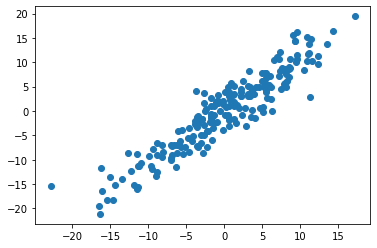

In [3]:
x = np.random.normal(scale=8, size=200)
y = x + np.random.normal(scale=3, size=200)

x -= np.mean(x)
y -= np.mean(y)
data = np.array([x, y])

plt.figure()
plt.scatter(x, y)
plt.show()

In [4]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data.T)
print(pca.components_.T)

[[-0.66651328 -0.74549316]
 [-0.74549316  0.66651328]]


In [5]:
df = pd.read_csv('iris.csv', names=['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])

In [6]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

x = df.loc[:, features].values
y = df.loc[:, ['target']].values
x = StandardScaler().fit_transform(x)

In [7]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                          columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

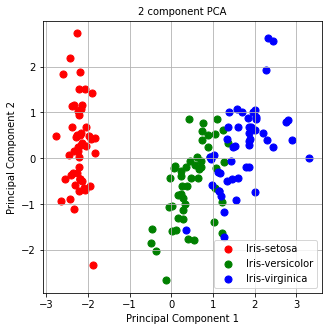

In [8]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 10)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
              , finalDf.loc[indicesToKeep, 'principal component 2']
              , c = color
              , s = 50)
ax.legend(targets)
ax.grid()

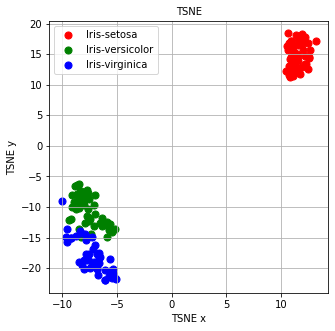

In [9]:
from sklearn.manifold import TSNE

x = df.loc[:, features].values
y = df.loc[:, ['target']].values
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(x)
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
tsneDf = pd.DataFrame(data = tsne_result,
                          columns = ['TSNE x', 'TSNE y'])
finalDf = pd.concat([tsneDf, df[['target']]], axis = 1)
ax.set_xlabel('TSNE x', fontsize = 10)
ax.set_ylabel('TSNE y', fontsize = 10)
ax.set_title('TSNE', fontsize = 10)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'TSNE x']
              , finalDf.loc[indicesToKeep, 'TSNE y']
              , c = color
              , s = 50)
ax.legend(targets)
ax.grid()